In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

In [56]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.ensemble import \
     (RandomForestClassifier as RFC,
      GradientBoostingClassifier as GBC,
      AdaBoostClassifier as ABC)
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

In [57]:
data = pd.read_csv('data.csv', sep=';')

In [58]:
features = list(data.columns)
classes = set(data['Target'])
X = data.drop('Target', axis=1)
y = data['Target']

In [59]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train_new, X_val, y_train_new, y_val = skm.train_test_split(X_train, y_train, test_size=0.125, random_state=0)

Bagging: n_estimators = 10
Train set accuracy: 0.9906
Test set accuracy: 0.7537
Validation set accuracy: 0.7336
Bagging: n_estimators = 25
Train set accuracy: 0.9987
Test set accuracy: 0.7729
Validation set accuracy: 0.7630
Bagging: n_estimators = 50
Train set accuracy: 1.0000
Test set accuracy: 0.7797
Validation set accuracy: 0.7630
Bagging: n_estimators = 75
Train set accuracy: 1.0000
Test set accuracy: 0.7864
Validation set accuracy: 0.7585
Bagging: n_estimators = 100
Train set accuracy: 1.0000
Test set accuracy: 0.7808
Validation set accuracy: 0.7562
Bagging: n_estimators = 200
Train set accuracy: 1.0000
Test set accuracy: 0.7864
Validation set accuracy: 0.7675


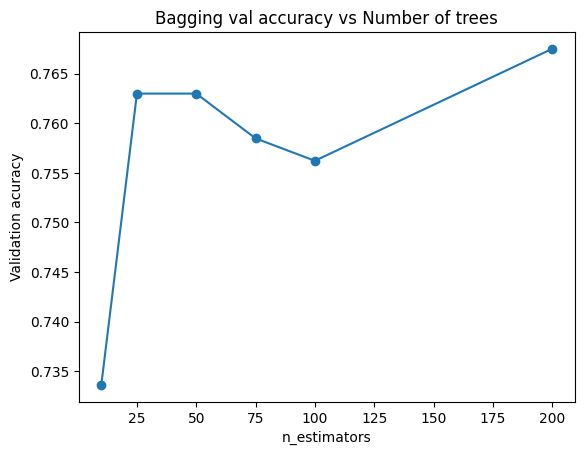

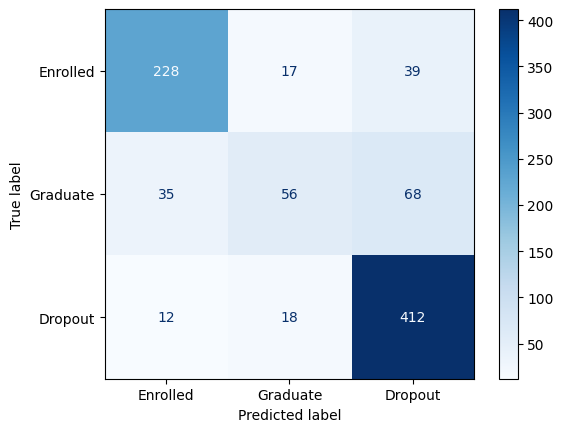

In [60]:
bagging_accuracies = {}
n_estimators_range = [10, 25, 50, 75, 100, 200]
# n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for n in n_estimators_range:
    clf = RFC(n_estimators=n, criterion='entropy', random_state=0)
    # clf = RFC(n_estimators=n, criterion='entropy',max_features=X_train_new.shape[1], random_state=0)
    clf.fit(X_train_new, y_train_new)
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    bagging_accuracies[n] = val_acc
    print(f'Bagging: n_estimators = {n}')
    print('Train set accuracy: %.4f' % accuracy_score(y_train_new, clf.predict(X_train_new)))
    print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))
    print('Validation set accuracy: %.4f' % val_acc)

plt.plot(n_estimators_range, list(bagging_accuracies.values()), marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Validation acuracy')
plt.title('Bagging val accuracy vs Number of trees')
plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues,
)

Random Forest: max_features = sqrt
Train set accuracy: 1.0000
Test set accuracy: 0.7808
Validation set accuracy: 0.7562
Random Forest: max_features = log2
Train set accuracy: 1.0000
Test set accuracy: 0.7763
Validation set accuracy: 0.7720


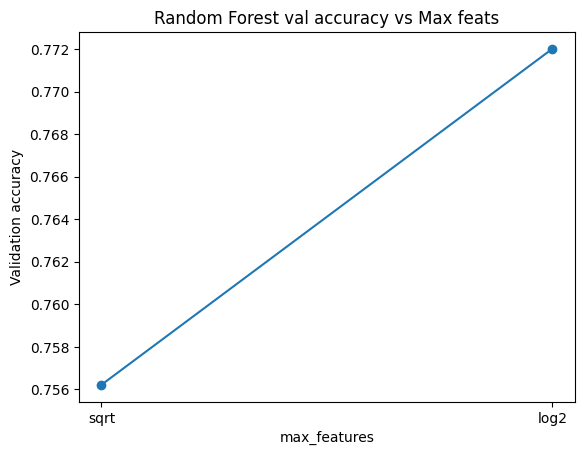

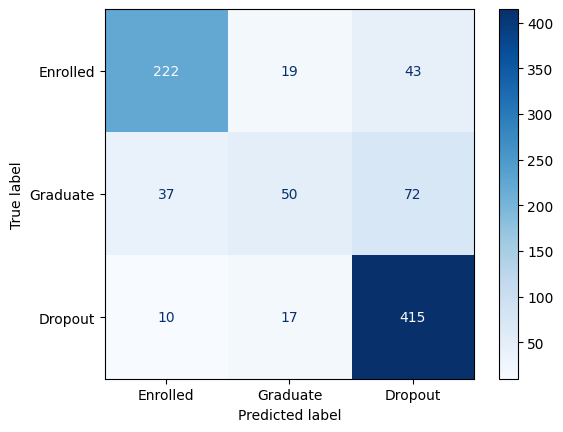

In [61]:
rf_accuracies = {}
max_features_options = ['sqrt', 'log2'] # None is causing an error and I think it is not needed in our case either

for max_feat in max_features_options:
    clf = RFC(criterion='entropy', max_features=max_feat, random_state=0)
    clf.fit(X_train_new, y_train_new)
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    rf_accuracies[max_feat] = val_acc
    print(f'Random Forest: max_features = {max_feat}')
    print('Train set accuracy: %.4f' % accuracy_score(y_train_new, clf.predict(X_train_new)))
    print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))
    print('Validation set accuracy: %.4f' % val_acc)

plt.plot(max_features_options, list(rf_accuracies.values()), marker='o')
plt.xlabel('max_features')
plt.ylabel('Validation accuracy')
plt.title('Random Forest val accuracy vs Max feats')
plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues,
)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.01, n_estimators = 10
Train set accuracy: 0.7054
Test set accuracy: 0.7062
Validation set accuracy: 0.7043
Boosting: learning_rate = 0.01, n_estimators = 50
Train set accuracy: 0.7116
Test set accuracy: 0.7175
Validation set accuracy: 0.7065


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.01, n_estimators = 100
Train set accuracy: 0.7190
Test set accuracy: 0.7277
Validation set accuracy: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.01, n_estimators = 200
Train set accuracy: 0.7206
Test set accuracy: 0.7299
Validation set accuracy: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.1, n_estimators = 10
Train set accuracy: 0.7190
Test set accuracy: 0.7277
Validation set accuracy: 0.7156
Boosting: learning_rate = 0.1, n_estimators = 50
Train set accuracy: 0.7358
Test set accuracy: 0.7446
Validation set accuracy: 0.7156


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.1, n_estimators = 100
Train set accuracy: 0.7445
Test set accuracy: 0.7503
Validation set accuracy: 0.7269


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.1, n_estimators = 200
Train set accuracy: 0.7626
Test set accuracy: 0.7559
Validation set accuracy: 0.7494


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.5, n_estimators = 10
Train set accuracy: 0.7297
Test set accuracy: 0.7345
Validation set accuracy: 0.7156
Boosting: learning_rate = 0.5, n_estimators = 50
Train set accuracy: 0.7610
Test set accuracy: 0.7559
Validation set accuracy: 0.7585


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.5, n_estimators = 100
Train set accuracy: 0.7762
Test set accuracy: 0.7684
Validation set accuracy: 0.7652


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 0.5, n_estimators = 200
Train set accuracy: 0.7800
Test set accuracy: 0.7684
Validation set accuracy: 0.7585


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 1.0, n_estimators = 10
Train set accuracy: 0.7406
Test set accuracy: 0.7424
Validation set accuracy: 0.7427
Boosting: learning_rate = 1.0, n_estimators = 50
Train set accuracy: 0.7629
Test set accuracy: 0.7582
Validation set accuracy: 0.7562


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 1.0, n_estimators = 100
Train set accuracy: 0.7775
Test set accuracy: 0.7638
Validation set accuracy: 0.7652


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting: learning_rate = 1.0, n_estimators = 200
Train set accuracy: 0.7907
Test set accuracy: 0.7684
Validation set accuracy: 0.7517


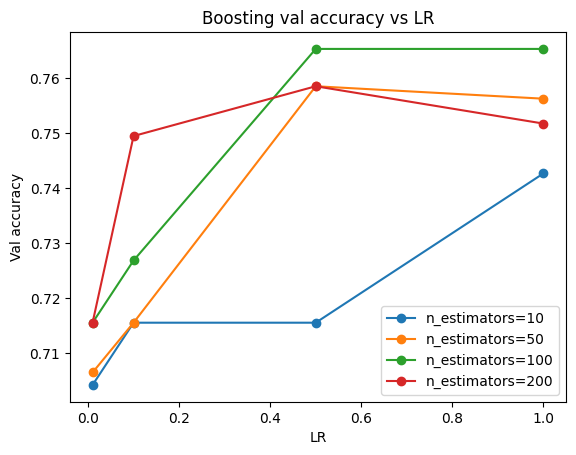

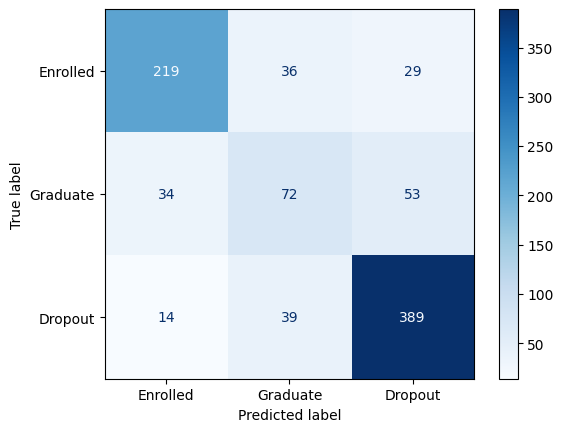

In [62]:
boosting_accuracies = {}
lr_range = [0.01, 0.1, 0.5, 1.0]
n_estimators_range = [10, 50, 100, 200]
# n_estimators_range = [10, 25, 50, 75, 100, 200]

for lr in lr_range:
    for n in n_estimators_range:
        clf = ABC(n_estimators=n, learning_rate=lr, random_state=0)
        clf.fit(X_train_new, y_train_new)
        val_acc = accuracy_score(y_val, clf.predict(X_val))
        boosting_accuracies[(lr, n)] = val_acc
        print(f'Boosting: learning_rate = {lr}, n_estimators = {n}')
        print('Train set accuracy: %.4f' % accuracy_score(y_train_new, clf.predict(X_train_new)))
        print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))
        print('Validation set accuracy: %.4f' % val_acc)

for n in n_estimators_range:
    plt.plot(lr_range, [boosting_accuracies[(lr, n)] for lr in lr_range], marker='o', label=f'n_estimators={n}')
plt.xlabel('LR')
plt.ylabel('Val accuracy')
plt.title('Boosting val accuracy vs LR')
plt.legend()
plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues,
)

In [67]:
print(f'Best Bagging validation accuracy at n_estimators = 200: 0.7675')
print(f'Best RF validation accuracy at max_feat = log2: 0.7720')
print(f'Best Boosting validation accuracy at LR = 0.5 and n_estimators = 100: 0.7652')
print('\n\nFrom previous lab\n')
print(f'Best DT validation accuracy at max_depth (8): 0.7582')
print(f'Best DT validation accuracy at best min_samples_leaf (13): 0.7322')
print(f'Best DT validation accuracy at best min_impurity_decrease (0.0036842105263157894): 0.7571')

Best Bagging validation accuracy at n_estimators = 200: 0.7675
Best RF validation accuracy at max_feat = log2: 0.7720
Best Boosting validation accuracy at LR = 0.5 and n_estimators = 100: 0.7652


From previous lab

Best DT validation accuracy at max_depth (8): 0.7582
Best DT validation accuracy at best min_samples_leaf (13): 0.7322
Best DT validation accuracy at best min_impurity_decrease (0.0036842105263157894): 0.7571


In [68]:
summary = {
    'Bagging': bagging_accuracies,
    'Random Forest': rf_accuracies,
    'Boosting': boosting_accuracies,
}

for i, res in summary.items():
    print(f"\n{i} Results:")
    for params, acc in res.items():
        print(f"{params}: {acc:.4f}")


Bagging Results:
10: 0.7336
25: 0.7630
50: 0.7630
75: 0.7585
100: 0.7562
200: 0.7675

Random Forest Results:
sqrt: 0.7562
log2: 0.7720

Boosting Results:
(0.01, 10): 0.7043
(0.01, 50): 0.7065
(0.01, 100): 0.7156
(0.01, 200): 0.7156
(0.1, 10): 0.7156
(0.1, 50): 0.7156
(0.1, 100): 0.7269
(0.1, 200): 0.7494
(0.5, 10): 0.7156
(0.5, 50): 0.7585
(0.5, 100): 0.7652
(0.5, 200): 0.7585
(1.0, 10): 0.7427
(1.0, 50): 0.7562
(1.0, 100): 0.7652
(1.0, 200): 0.7517
